<a href="https://colab.research.google.com/github/adolfoguimaraes/teoriadosgrafos/blob/main/05_Colora%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coloração

![](https://media.giphy.com/media/FE0WTM8BG754I/giphy.gif)

Na última aula trabalhamos com uma técnica de grafos chamada de **Coloração**. A coloração consiste em colorir um conjunto de vértices de forma que os vértices adjacentes não tenham a mesma cor. Essa abstração de cores pode ser aplicada a diferentes cenários. 

Vamos implementar um dos algoritmos de coloração vistos em sala de aula. Preparados?

![](https://media.giphy.com/media/CjmvTCZf2U3p09Cn0h/giphy.gif)


## Imports e Métodos auxiliares

In [ ]:

# importando a biblioteca 

import networkx as nx
import math

# importação da biblioteca para plotagem de gráficos 
import matplotlib.pyplot as plt

In [ ]:
# Função em Python para facilitar a impressão do Grafo. 

def exibir_grafo(grafo, labels=False, node_size=600, fig_size=(10,7), node_color='#0080FF'):

  
  options = {
      'node_color': node_color,
      'edge_color': '#808080',
      'node_size': node_size,
      'width': 2,
      'font_color': 'white',
      'font_weight': 'bold',
      'font_size': 10

  }
  plt.figure(1)
  plt.figure(figsize=fig_size)
  
  nx.draw_networkx(
      grafo, 
      pos=nx.spring_layout(grafo), 
      with_labels=True,
      **options
  )

  
  plt.show()

## Grafos de Exemplo

Vamos utilizar dois grafos dos slides como grafos de exemplos. 

<Figure size 432x288 with 0 Axes>

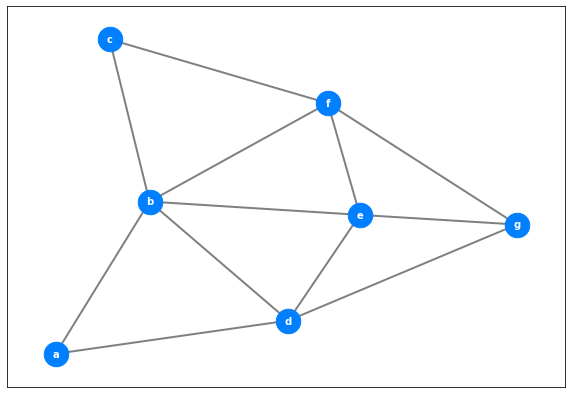

In [ ]:
# Instanciando o objeto Grafo
G = nx.Graph()

# Adicionando os Vértices
G.add_nodes_from(['a','b','c','d','e','f','g'])

# Adicionando as Arestas
G.add_edges_from([
                  ('a','b'),('a','d'),
                  ('b','c'),('b','d'),('b','e'),('b','f'),
                  ('c','f'),
                  ('d','e'),('d','g'),
                  ('e','f'),('e','g'),
                  ('f','g')
                  ])
                 

exibir_grafo(G)

## Colorindo o Grafo

Vamos resolver esse problema por partes. Vamos primeiro pensar no algoritmo que vimos em sala de aula e listar os passos necessários para implementa-lo.

1. Calcular o grau de cada vértice;
2. Ordenar os vértices de acordo com o grau;
3. Escolher uma cor;
4. Colorir o máximo de vértices possíveis com a cor escolhida. Sempre seguindo a ordem decrescente do grau dos vértices;
4. Quando não for mais possível colorir nenhum vértice e ainda tiver vértices sem colorir, retorna para o passo 3.

Perceba que o algoritmo é composto por poucas etapas, vamos implementa-las a seguir.

![](https://media.giphy.com/media/lTRuG1F4VZ3LHMpXY2/giphy.gif)

### Calculando o grau de cada vértice

Para calcular o grau de cada vértice, vamos utilizar métodos da própria biblioteca NetworkX.

In [ ]:
# Método que retorna os centros do grafo
def get_degree(node, graph):

  return graph.degree[node]



In [ ]:
get_degree('b', G)

5

### Ordenar os vértices de acordo com o grau

Já temos nossa função que retorna o grau de cada vértice, vamos ordenar esses vértices de acordo com o grau.

In [ ]:
def get_ordered_nodes(graph):

  dict_nodes = {}

  for node in list(graph.nodes):
    dict_nodes[node] = get_degree(node, graph)
  

  sorted_dict = dict(sorted(dict_nodes.items(), key=lambda kv: kv[1], reverse=True))


  return list(sorted_dict.keys())


In [ ]:
get_ordered_nodes(G)

['b', 'd', 'e', 'f', 'g', 'a', 'c']

### Escolher a cor e colorir o vértice


In [ ]:
def test_neighbors_color(node, colors, color, graph):

  neigh_ = graph.neighbors(node)

  for neigh in neigh_:

    if neigh in colors.keys():
      if color == colors[neigh]:
        return True

  return False



In [ ]:
# Associandos os vértices a cores

colors = ['#e06666','#f9a650','#ffd966','#93c47d','#76a5af']
ordered_nodes = get_ordered_nodes(G)

pick_color = colors[0]
colors_node = {}

while len(ordered_nodes) > 0:
  pick_nodes = []  
  for node in ordered_nodes:
    
    if(not test_neighbors_color(node, colors_node, pick_color, G)):
      
      colors_node[node] = pick_color
      pick_nodes.append(node)
    
  
  ordered_nodes = [node for node in ordered_nodes if node not in pick_nodes]
  colors.remove(pick_color)

  if len(colors) > 0:
    pick_color = colors[0]
  else:
    break

print(colors_node)

{'b': '#e06666', 'g': '#e06666', 'd': '#f9a650', 'f': '#f9a650', 'e': '#ffd966', 'a': '#ffd966', 'c': '#ffd966'}


In [ ]:
temp_dict = dict(sorted(colors_node.items(), key=lambda kv: kv[0]))
colors_ = list(temp_dict.values())
colors_

['#ffd966', '#e06666', '#ffd966', '#f9a650', '#ffd966', '#f9a650', '#e06666']

<Figure size 432x288 with 0 Axes>

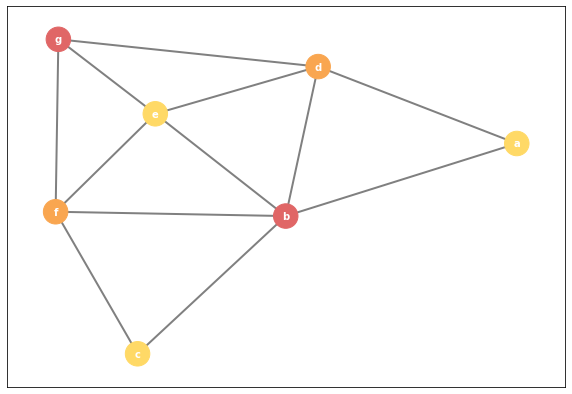

In [ ]:
exibir_grafo(G, node_color=colors_)

### Criando um método de coloração "Genérico"

In [ ]:
# Associandos os vértices a cores

def apply_color(graph, colors):

  ordered_nodes = get_ordered_nodes(graph)

  pick_color = colors[0]
  colors_node = {}

  while len(ordered_nodes) > 0:
    pick_nodes = []  
    for node in ordered_nodes:
      
      if(not test_neighbors_color(node, colors_node, pick_color, graph)):
        
        colors_node[node] = pick_color
        pick_nodes.append(node)
      
    
    ordered_nodes = [node for node in ordered_nodes if node not in pick_nodes]
    colors.remove(pick_color)
    
    if len(colors) > 0:
      pick_color = colors[0]
    else:
      break

  return colors_node

In [ ]:
colors = ['P1','P2', 'P3', 'P4', 'P5', 'P6']
apply_color(G, colors)

{'a': 'P3', 'b': 'P1', 'c': 'P3', 'd': 'P2', 'e': 'P3', 'f': 'P2', 'g': 'P1'}

## Aplicar em um problema

![](https://media.giphy.com/media/4Hx5nJBfi8FzFWxztb/giphy.gif)

Vamos trabalhar com os dois problemas vistos em sala de aula. O primeiro foi os das disciplinas e o segundo foi da viagem. Neste segundo, vamos precisar adapatar nosso algoritmo. 


### Exemplo 1

No primeiro exemplo, a gente mapeou a tabela de relação das disciplinas como um grafo. Vamos fazer novamente esse mapeamento e construir o grafo aqui. 

O problema visto foi o de alocação de disciplinas. O primeiro passo foi mapear para um grafo e em seguida identificar o que eram cores. Para isso, vamos considerar a seguinte distribuição das distribuição das disciplinas.

| Código do Aluno | Disciplinas |
|-----------------|-------------|
| 1               | A, B        |
| 2               | A, D        |
| 3               | D, E, F     |
| 4               | B, C        |
| 5               | A, C        |
| 6               | B, E        |
| 7               | C, F        |
| 8               | E, G        |


Neste caso, as disciplinas vão ser os vértices e as arestas a relação de que pelo menos um aluno está cursando aquela disciplina. 

Vamos construir o grafo.



<Figure size 432x288 with 0 Axes>

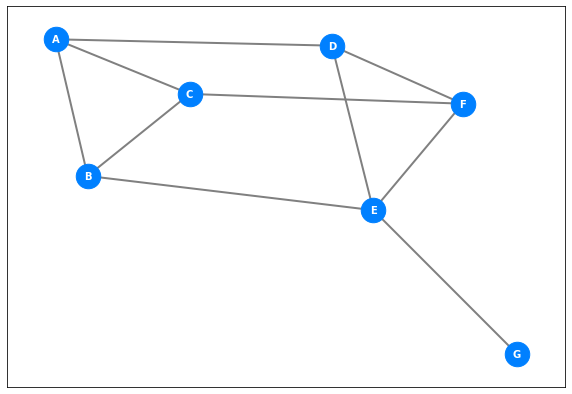

In [ ]:
# Instanciando o objeto Grafo
G1 = nx.Graph()

# Adicionando os Vértices
G1.add_nodes_from(['A','B','C','D','E','F','G'])

# Adicionando as Arestas
G1.add_edges_from([
                  ('A','B'),('A','C'), ('A','D'),
                  ('B','C'),('B','E'),
                  ('C','F'),
                  ('D','E'),('D','F'),
                  ('E','G'),('E','F')
                  ])
                 

exibir_grafo(G1)

In [ ]:
colors = ['P1','P2', 'P3', 'P4', 'P5', 'P6']
apply_color(G1, colors)

{'A': 'P1', 'B': 'P2', 'C': 'P3', 'D': 'P2', 'E': 'P1', 'F': 'P4', 'G': 'P2'}

### Exemplo 2

O nosso segundo exemplo foi o da organização do ônibus para a excurção escolar. Vamos relembrar o problema. 

João está organizando uma excursão para Itacaré com os colegas da escola e ficou responsável de distribuir os passageiros nas poltronas da van. No entanto, ele deve ter cuidado para não incluir em poltronas vizinhas colegas que não se dão bem. Foi pedido também que todos os casais viagem em poltronas vizinhas. A imagem a seguir mostra as informações que o líder de turma passou para João sobre os relacionamentos entre os companheiros de turma.

* Maria namora José;
* Carlos não se dá bem com Gabriela;
* Gabriela é ex-namorada de Fernando e o fim do namoro não foi amigável;
* Gabriela já disse que não viaja junto nem de Jonas e nem de Carla;
* Carla e Manoela já disseram que viajam desde que não seja ao lado nem do Fábio e nem do Fernando;
* Joana namora Raul;
* A professora Miriam é casada com o diretor Alberto;
* Jonas já disse que não viaja ao lado nem do João e nem do Fernando;
* Fábio só tem implicância com o diretor Alberto;
* João é amigo de todo mundo.

Nesse exemplo, os vértices são as pessoas e as arestas vai ser a relação que indica que eles tem alguma implicância de acordo com a lista passada. Vamos construir o Grafo então.

**Vértices:** Maria, José, Carlos, Gabriela, Fernando, Jonas, Carla, Manoela, Fábio, Joana, Raul, Miriam, Alberto, João.


<Figure size 432x288 with 0 Axes>

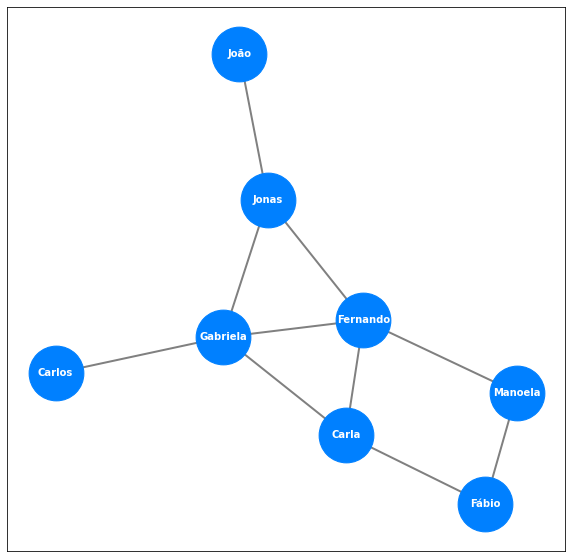

In [ ]:
# Instanciando o objeto Grafo
G2 = nx.Graph()

# Adicionando os Vértices
#G2.add_nodes_from(['Maria', 'José', 'Carlos', 'Gabriela', 'Fernando', 'Jonas', 'Carla', 'Manoela', 'Fábio', 'Joana', 'Raul', 'Miriam', 'Alberto', 'João'])
G2.add_nodes_from(['Carlos', 'Gabriela', 'Fernando', 'Jonas', 'Carla', 'Manoela', 'Fábio', 'João'])

G2.add_edges_from([
                    ('Carlos','Gabriela'),
                   ('Gabriela','Fernando'),
                   ('Gabriela','Jonas'),
                   ('Gabriela','Carla'),
                   ('Carla', 'Fábio'),
                   ('Carla','Fernando'),
                   ('Manoela','Fábio'),
                   ('Manoela','Fernando'),
                   ('Jonas','Fernando'),
                   ('Jonas','João'),
])


exibir_grafo(G2, fig_size=(10,10), node_size=3000)

In [ ]:
couples = [('Maria','José'),('Joana','Raul'),('Miriam','Alberto')]

colors_ = ['A','B','C','D','E','F','G']

colors_node_ = {}

for couple in couples:
  pick_color = colors_[0]
  colors_node_[couple[0]] = pick_color
  colors_node_[couple[1]] = pick_color
  colors_.remove(pick_color)

print(colors_node_)
print(colors_)

{'Maria': 'A', 'José': 'A', 'Joana': 'B', 'Raul': 'B', 'Miriam': 'C', 'Alberto': 'C'}
['D', 'E', 'F', 'G']


In [ ]:
# Associandos os vértices a cores

def apply_color_adapted(graph, colors, colors_node):
  
  ordered_nodes = get_ordered_nodes(graph)
  
  pick_color = colors[0]
  
  while len(ordered_nodes) > 0:
    pick_nodes = []  
    count_use_color = 0
    for node in ordered_nodes:
      
      if(not test_neighbors_color(node, colors_node, pick_color, graph)):
        colors_node[node] = pick_color
        pick_nodes.append(node)
        count_use_color += 1

        if count_use_color == 2:
          break
      
    
    ordered_nodes = [node for node in ordered_nodes if node not in pick_nodes]
    colors.remove(pick_color)

    if len(colors) > 0:
      pick_color = colors[0]
    else:
      break
      

  return colors_node

In [ ]:
apply_color_adapted(G2, colors_, colors_node_)

{'Alberto': 'C',
 'Carla': 'F',
 'Carlos': 'G',
 'Fernando': 'E',
 'Fábio': 'E',
 'Gabriela': 'D',
 'Joana': 'B',
 'Jonas': 'F',
 'José': 'A',
 'João': 'G',
 'Manoela': 'D',
 'Maria': 'A',
 'Miriam': 'C',
 'Raul': 'B'}

### Por hoje é só :)

É isso pessoal. Essa implementação serve não só para que a gente aplique os conceitos vistos em sala de aula, mas também para que vocês vão se acostumando como implementar utilizando a biblioteca e, principalmente, como sair do algoritmo que vimos em sala de aula para a lógica de progração. 

![](https://media.giphy.com/media/26DN48mfu3uWJ3J7y/giphy.gif?cid=ecf05e47ic3zerdnxap46ifvv661vtpn8cgzhu2eitl9z6bu&rid=giphy.gif&ct=g)

Até a próxima :) 